In [4]:
# Import the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
zoo_animals = pd.read_csv('data/Zoo-animals.csv')

In [5]:
zoo_animals

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


In [6]:
# Finding out the length of the dataset

print("Dataset length::", len(zoo_animals))

# Finding out the shapes (rows and columns of the dataset )

print("Dataset Shape::",zoo_animals.shape)

Dataset length:: 10
Dataset Shape:: (10, 5)


In [7]:
# Finding out the column headings

print("Dataset::")
zoo_animals.head()

Dataset::


,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal


## Steps tp implement Decision Tree

In [12]:
# 1. Separating the Target Variable "Species"

X = zoo_animals.drop("species",axis = 1)

y = zoo_animals["species"]

# 2. Splitting Dataset into Test and Train

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3
                                                   ,random_state=100)

# 3. Function to perform training with Entropy

clf = DecisionTreeClassifier(criterion ="entropy",random_state=100,
max_depth = 3,min_samples_leaf=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=100)

In [13]:
# Function to make predictions

y_pred_en = clf.predict(X_test)
y_pred_en

array(['Reptile', 'Reptile', 'Mammal'], dtype=object)

In [14]:
# Checking Accuracy

print("Accuracy is ",accuracy_score(y_test,y_pred_en)*100)


Accuracy is  100.0


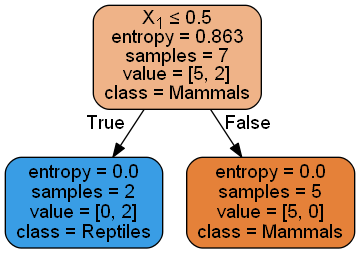

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['Mammals','Reptiles'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('zoo-animals.png')
Image(graph.create_png())